## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns

In [55]:
df = pd.read_csv('cleaned_ecommerce_dataset.csv')
print(len(df))

2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [56]:
# How many columns and data types of each column
print(df.head())
print(df.info())
print(df.shape)
df.dtypes

   userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       30.74          4  
1  Restaurants & Gourmet    

userId           int64
timestamp        int64
review          object
item            object
rating         float64
helpfulness    float64
gender          object
category        object
item_id          int64
item_price     float64
user_city        int64
dtype: object

In [57]:
#convert the categorical features to numerical
from sklearn.preprocessing import OrdinalEncoder

ordinalEnc = OrdinalEncoder()
df["num_gender"] = ordinalEnc.fit_transform(df[["gender"]])
df[["gender", "num_gender"]].head()

,gender,num_gender
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0


In [58]:
#convert the categorical features to numerical
df["num_helpfulness"] = ordinalEnc.fit_transform(df[["helpfulness"]])
df[["helpfulness", "num_helpfulness"]].head()

,helpfulness,num_helpfulness
0,3.0,0.0
1,4.0,1.0
2,4.0,1.0
3,3.0,0.0
4,3.0,0.0


In [59]:
#convert the categorical features to numerical
df["num_category"] = ordinalEnc.fit_transform(df[["category"]])
df[["category", "num_category"]].head()

,category,num_category
0,Restaurants & Gourmet,8.0
1,Restaurants & Gourmet,8.0
2,Restaurants & Gourmet,8.0
3,Movies,5.0
4,Movies,5.0


In [60]:
#convert the categorical features to numerical
df["num_review"] = ordinalEnc.fit_transform(df[["review"]])
df[["review", "num_review"]].head()

,review,num_review
0,Not always McCrap,1618.0
1,I dropped the chalupa even before he told me to,1125.0
2,The Wonderful World of Wendy,2185.0
3,They actually did it,2243.0
4,Hey! Gimme some pie!,1033.0


In [61]:
#convert the categorical features to numerical
df["num_rating"] = ordinalEnc.fit_transform(df[["rating"]])
df[["rating", "num_rating"]].head()

,rating,num_rating
0,4.0,3.0
1,1.0,0.0
2,5.0,4.0
3,5.0,4.0
4,3.0,2.0


In [62]:
#correlations between helpfulness/gender/category/review and rating
print(df['num_helpfulness'].corr(df['num_rating']))
print(df['num_gender'].corr(df['num_rating']))
print(df['num_category'].corr(df['num_rating']))
print(df['num_review'].corr(df['num_rating']))

-0.007523337726844559
-0.03433661424208275
-0.1631576534091565
-0.03611838655212237


In [ ]:
#Please provide necessary explanations/analysis on the correlations (most and least)

# Correlation is a relationship between two variables. 
# The correlation measured on the scale that varies from +1 through 0 to -1. 
# When one variable increases and the other one increases as well the correlation is positive, 
# but when one variable increases and the other one decreases, the correlation is negative.
# The closer the correlation is to 0, the weaker it is.
# The closer the correlation is to -/+1, the stronger it is.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [63]:
#Case 1
train_case1, test_case1 = train_test_split(df, test_size=0.9, train_size=0.1)

In [64]:
#Case 2
train_case2, test_case2 = train_test_split(df, test_size=0.1, train_size=0.9)

In [65]:
#Print the shape of training and testing sets in the first case
print("Case 1 Training data shape:", train_case1.shape)
print("Case 1 testing data shape:", test_case1.shape)

Case 1 Training data shape: (268, 16)
Case 1 testing data shape: (2417, 16)


In [66]:
#Print the shape of training and testing sets in the second case
print("Case 2 Training data shape:", train_case2.shape)
print("Case 2 testing data shape:", test_case2.shape)

Case 2 Training data shape: (2416, 16)
Case 2 testing data shape: (269, 16)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [75]:
most_correlated= ['num_category', 'num_review']
least_correlated= ['num_gender','num_helpfulness']

# Model a
reg = linear_model.LinearRegression()

X_train_a = train_case1[most_correlated]
y_train_a = train_case1['num_rating']

X_test_a = test_case1[most_correlated]
y_test_a = test_case1['num_rating']

reg.fit(X_train_a, y_train_a)

LinearRegression()

In [82]:
# Model b
reg = linear_model.LinearRegression()

X_train_b = train_case1[least_correlated]
y_train_b = train_case1['num_rating']

X_test_b = test_case1[least_correlated]
y_test_b = test_case1['num_rating']

reg.fit(X_train_b, y_train_b)

LinearRegression()

In [86]:
# Model c
reg = linear_model.LinearRegression()

X_train_c = train_case2[most_correlated]
y_train_c = train_case2['num_rating']

X_test_c = test_case2[most_correlated]
y_test_c = test_case2['num_rating']

reg.fit(X_train_c, y_train_c)

LinearRegression()

In [89]:
# Model d
reg = linear_model.LinearRegression()

X_train_d = train_case2[least_correlated]
y_train_d = train_case2['num_rating']

X_test_d = test_case2[least_correlated]
y_test_d = test_case2['num_rating']

reg.fit(X_train_d, y_train_d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [80]:
# Model a
predicted = reg.predict(X_test_a)
mse_a = ((np.array(y_test_a)-predicted)**2).sum()/len(y_test_a)
r2_a = r2_score(y_test_a, predicted)
mse_sqr_a = np.sqrt(mse_a)
print("MSE:", mse_a)
print("R Squared:", r2_a)
print("Root MSE: ", mse_sqr_a)

MSE: 1.7318573360418692
R Squared: 0.029762508737108284
Root MSE:  1.316000507614594


In [84]:
# Model b
predicted = reg.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted)**2).sum()/len(y_test_b)
r2_b = r2_score(y_test_b, predicted)
mse_sqr_b = np.sqrt(mse_b)
print("MSE:", mse_b)
print("R Squared:", r2_b)
print("Root MSE: ", mse_sqr_b)

MSE: 1.790240666914097
R Squared: -0.002945552890245118
Root MSE:  1.3379987544516239


In [88]:
# Model c
predicted = reg.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted)**2).sum()/len(y_test_c)
r2_c = r2_score(y_test_c, predicted)
mse_sqr_c = np.sqrt(mse_c)
print("MSE:", mse_c)
print("R Squared:", r2_c)
print("Root MSE: ", mse_sqr_c)

MSE: 1.798324041371416
R Squared: 0.0435804880442382
Root MSE:  1.3410160481408924


In [90]:
# Model d
predicted = reg.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted)**2).sum()/len(y_test_d)
r2_d = r2_score(y_test_d, predicted)
mse_sqr_d = np.sqrt(mse_d)
print("MSE:", mse_d)
print("R Squared:", r2_d)
print("Root MSE: ", mse_sqr_d)

MSE: 1.8963942774805327
R Squared: -0.008577123820494359
Root MSE:  1.3770963210612874


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [94]:
new1_df = pd.DataFrame({'model':['A', 'C'], 'MSE': [mse_a, mse_c], 'RMSE':[mse_sqr_a, mse_sqr_c]})
new2_df = pd.DataFrame({'model':['B', 'D'], 'MSE': [mse_b, mse_d], 'RMSE':[mse_sqr_b, mse_sqr_d]})

<AxesSubplot:xlabel='model'>

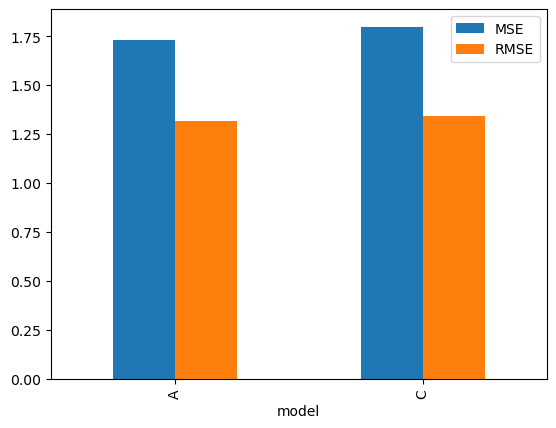

In [95]:
new1_df.plot(kind='bar', x='model')

<AxesSubplot:xlabel='model'>

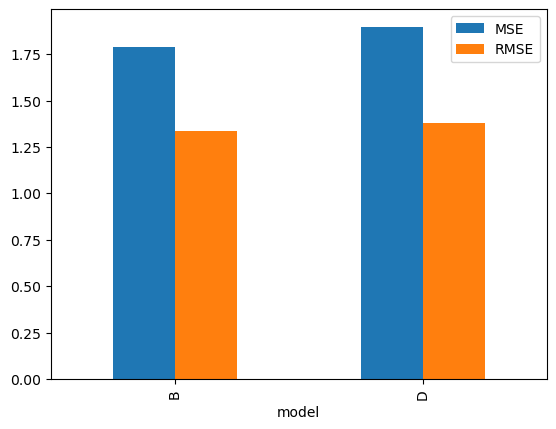

In [96]:
new2_df.plot(kind='bar', x='model')

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


In [ ]:

 '''
 
 There are a few potential ethical concerns associated with this way of presenting data.
 Firstly, this infographic prioritizes total medals won which can overshadow a country's performance in specific events or sports.
 for example, if a country wins a lot of medals in sports with many medal categories, like tennis or basketball, might appear higher in the ranking than a country that wins medals in sports with fewer categories.
 Secondly, these table are differ just in one thing which how to choose the sort of data and nothing else.
 Like, table 1 illustrates in how united states led to win the competition but in table 2, it shows how China led to recieve most gold medals in the competition.
 
 '''
